In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brijbhushannanda1979/bigmart-sales-data")

print("Path to dataset files:", path)

c:\Users\zeyad-mohamed\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 307k/307k [00:00<00:00, 850kB/s]

Extracting files...
Path to dataset files: C:\Users\zeyad-mohamed\.cache\kagglehub\datasets\brijbhushannanda1979\bigmart-sales-data\versions\1


In [12]:
train_data = os.path.join(path, "Train.csv")
test_data = os.path.join(path, "Test.csv")

In [15]:
# read train data
train_df = pd.read_csv(train_data)

# quick checks
print("Train shape:", train_df.shape)
train_df.head()

Train shape: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handle the Missing Values


In [ ]:
train_df['Item_Weight'] = train_df.groupby('Item_Identifier')['Item_Weight'].transform(
    lambda x: x.fillna(x.median())
)
train_df['Item_Weight'].fillna(train_df['Item_Weight'].median(), inplace=True)

In [ ]:
mode_value = train_df['Outlet_Size'].mode()[0]
train_df['Outlet_Size'].fillna(mode_value, inplace=True)


Medium


In [21]:
train_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Visualization

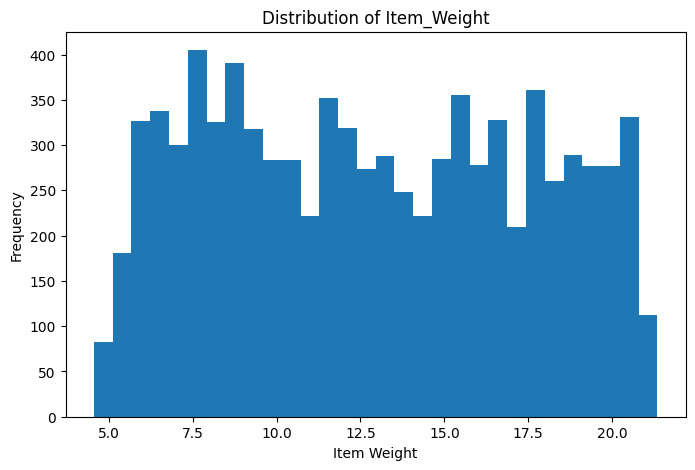

In [33]:
plt.figure(figsize=(8,5))
plt.hist(train_df["Item_Weight"],bins=30)
plt.title("Distribution of Item_Weight")
plt.xlabel("Item Weight")
plt.ylabel("Frequency")
plt.show()

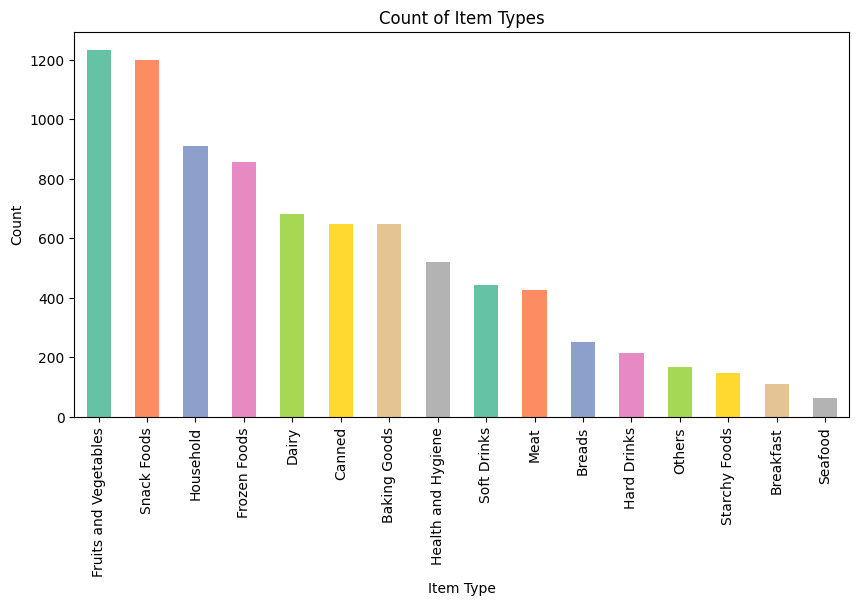

In [27]:
plt.figure(figsize=(10,5))
train_df["Item_Type"].value_counts().plot(kind="bar", color=plt.cm.Set2.colors)
plt.title("Count of Item Types")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_14192\3096228603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


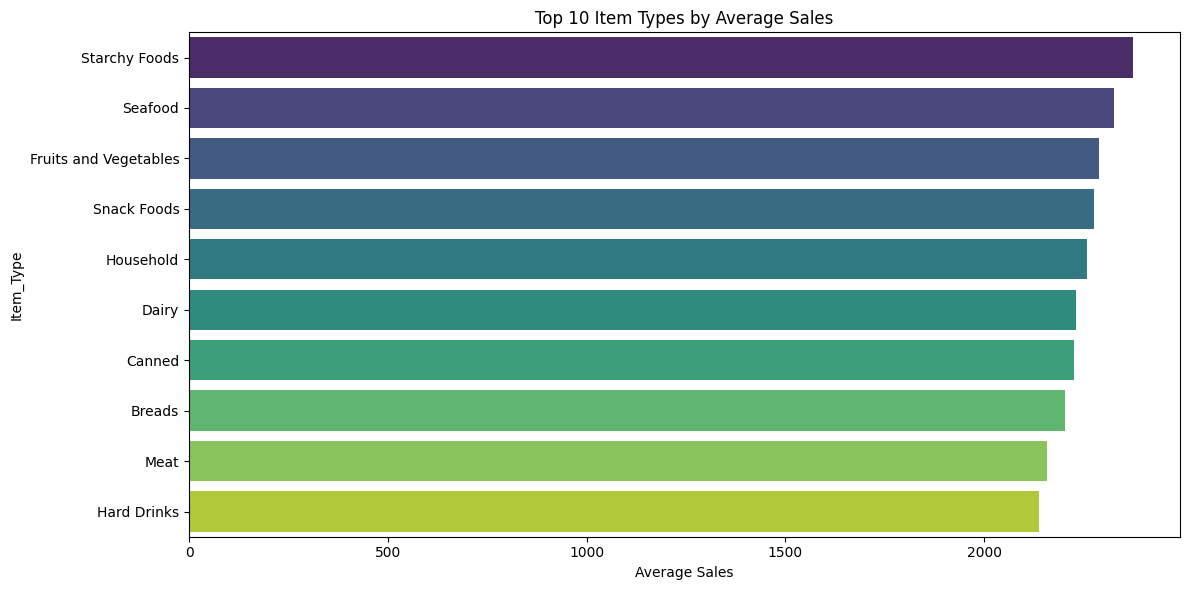

In [31]:
plt.figure(figsize=(12, 6))
top_items = train_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Item Types by Average Sales')
plt.xlabel('Average Sales')
plt.tight_layout()

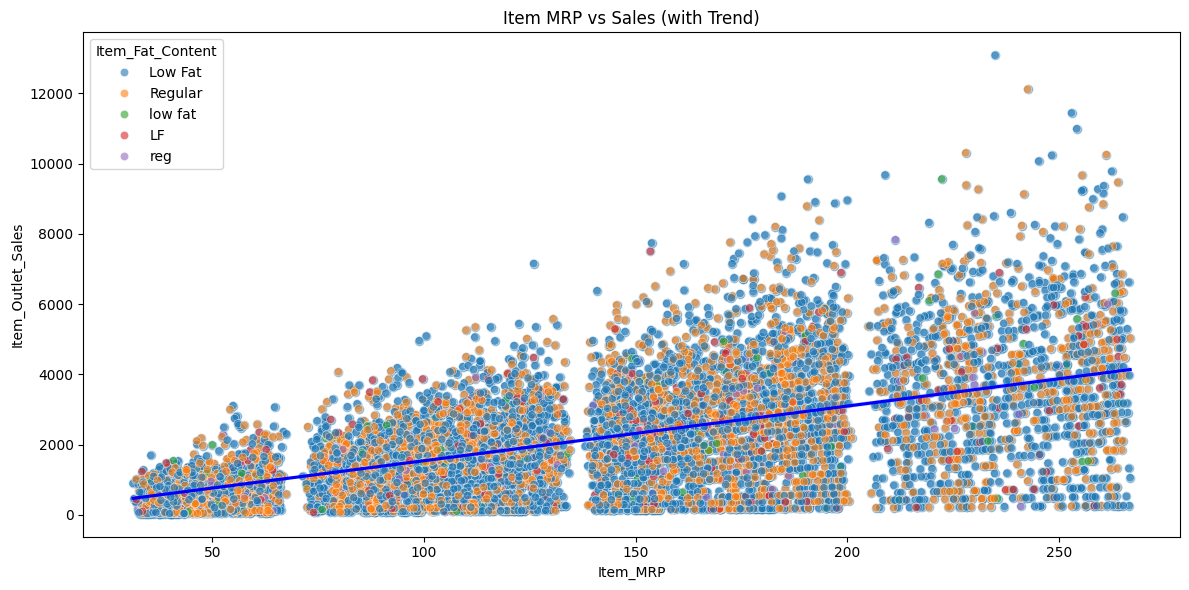

In [34]:
plt.figure(figsize=(12, 6))
sns.regplot(data=train_df, x='Item_MRP', y='Item_Outlet_Sales', scatter_kws={'alpha':0.4}, line_kws={'color':'blue'})
sns.scatterplot(data=train_df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', alpha=0.6)
plt.title('Item MRP vs Sales (with Trend)')
plt.tight_layout()

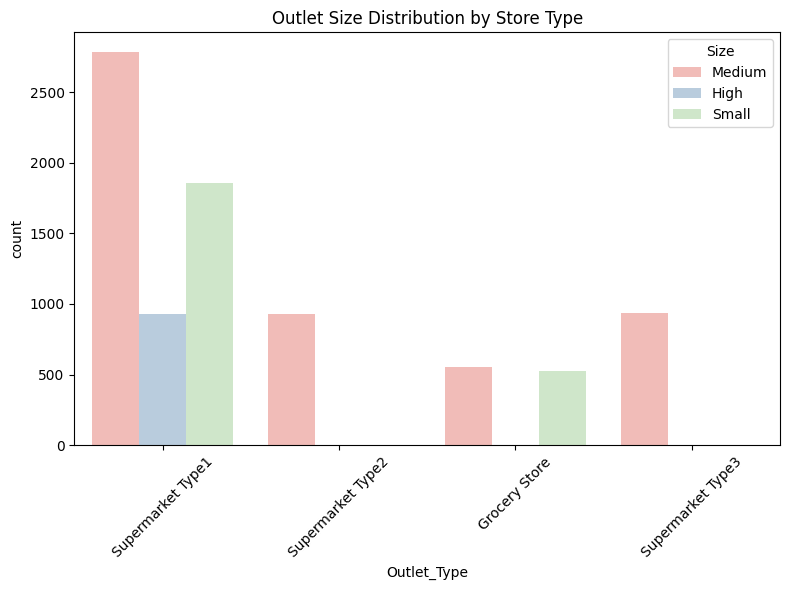

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Outlet_Type', hue='Outlet_Size', palette='Pastel1')
plt.title('Outlet Size Distribution by Store Type')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.tight_layout()

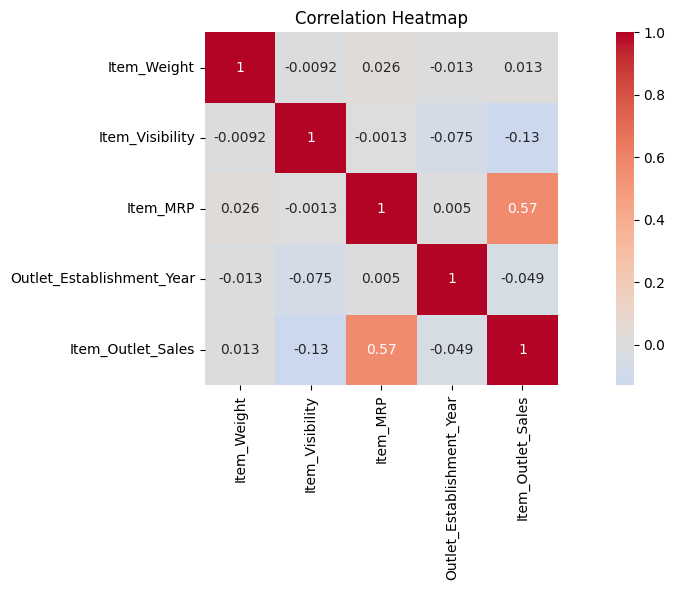

In [36]:
plt.figure(figsize=(12, 6))
corr = train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [37]:
cat_features = [col for col in train_df.columns if train_df[col].dtype == 'object']
num_features = [col for col in train_df.columns if train_df[col].dtype != 'object' and col != 'Item_Outlet_Sales']

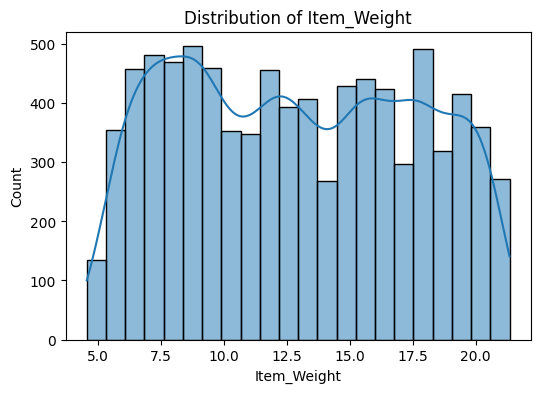

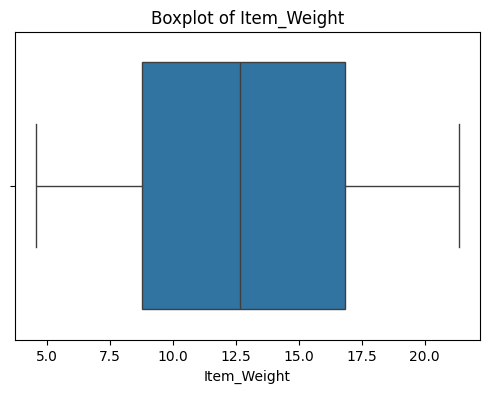

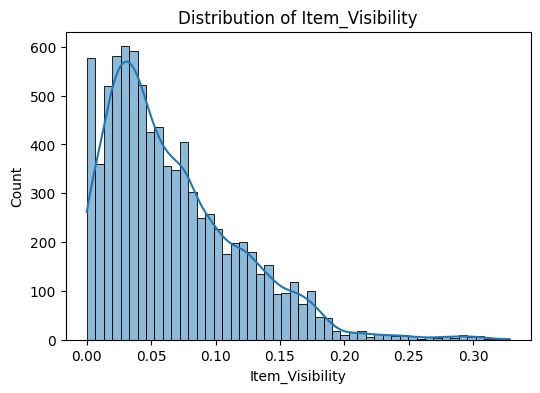

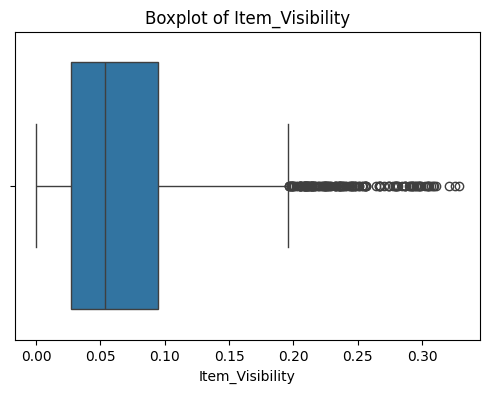

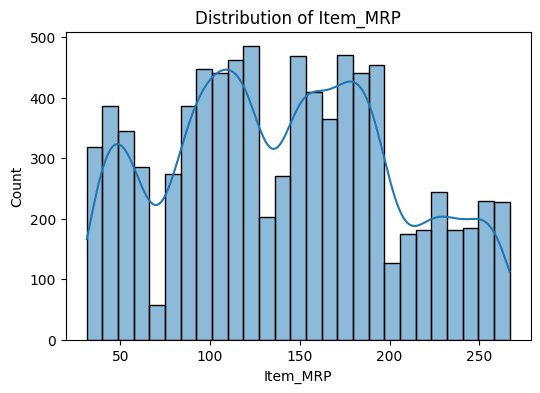

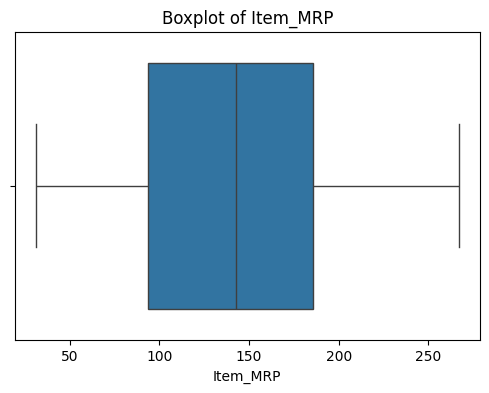

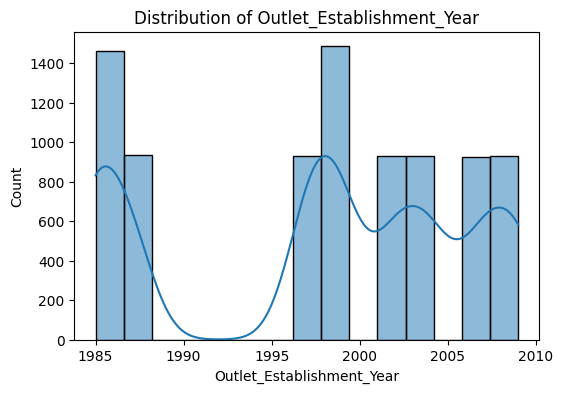

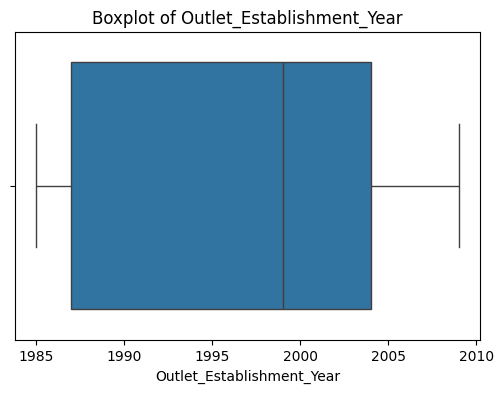

In [38]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# EDA 

In [41]:
train_df["Item_Category"] = train_df["Item_Identifier"].str[:2]
train_df.drop(columns=["Item_Identifier"], inplace=True)
train_df["Item_Category"].value_counts()

Item_Category
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [39]:
train_df["Item_Fat_Content"] = train_df["Item_Fat_Content"].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})
train_df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [43]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [71]:
train_df['Item_Category'].value_counts()

Item_Category
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [44]:
data = train_df.copy()

In [63]:
data.drop(columns = ['Item_Type', 'Outlet_Identifier','Outlet_Establishment_Year'],inplace=True)

In [64]:
data.shape

(8523, 9)

In [65]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC


In [73]:
data.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Category           0
dtype: int64

In [74]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875314,0.066132,140.992782,2181.288914
std,4.645010,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.785000,0.026989,93.826500,834.247400
50%,12.650000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


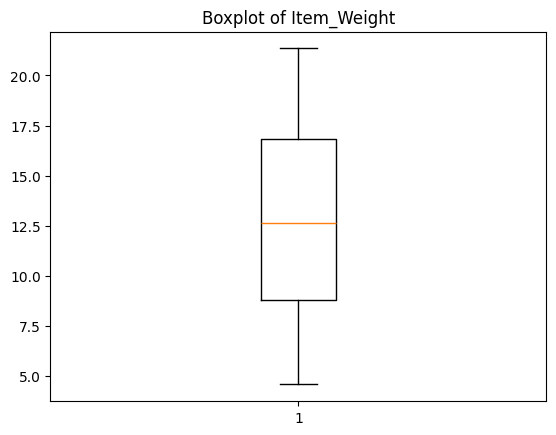

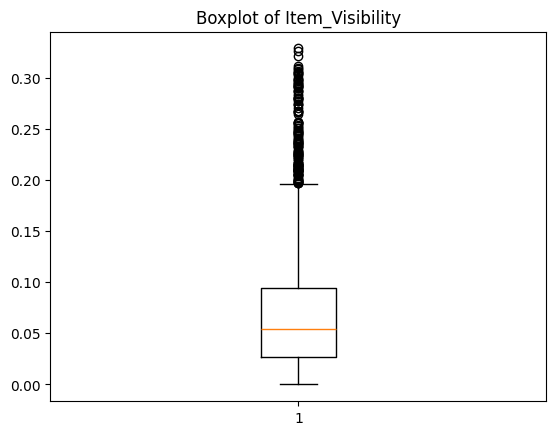

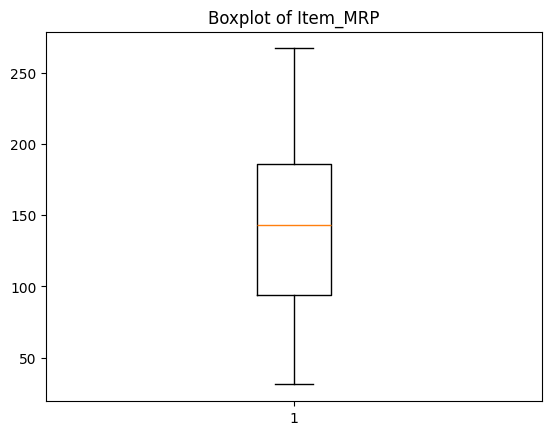

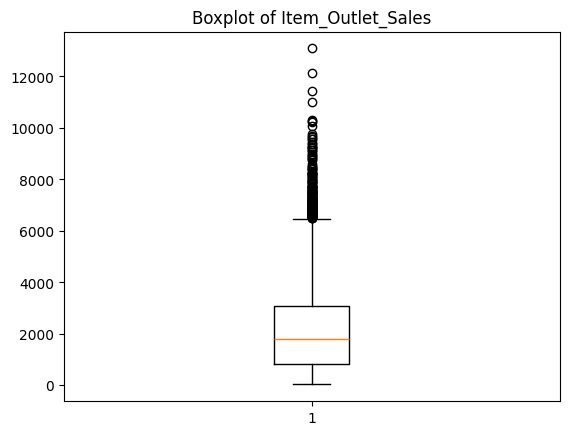

In [75]:
for col in data.select_dtypes(include=['number']).columns:
    plt.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [87]:
import numpy as np
import pandas as pd

# الطريقة الأفضل: استبدال الـ 0 بـ median visibility في نفس Item_Category
data['Item_Visibility'] = data.groupby('Item_Category')['Item_Visibility'].transform(
    lambda x: x.replace(0, x[x > 0].median())
)

In [88]:
print("أقل قيمة في Item_Visibility بعد التعديل:")
print(data['Item_Visibility'].min())  # لازم تكون > 0 دلوقتي
print("\nفيه أصفار تانية؟")
print((data['Item_Visibility'] == 0).sum())  # لازم يطلع 0

أقل قيمة في Item_Visibility بعد التعديل:
0.003574698

فيه أصفار تانية؟
0


In [89]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,log_Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875314,0.069713,140.992782,2181.288914,7.297863
std,4.645010,0.048837,62.275067,1706.499616,1.015211
min,4.555000,0.003575,31.290000,33.290000,3.534854
25%,8.785000,0.033085,93.826500,834.247400,6.727728
50%,12.650000,0.059417,143.012800,1794.331000,7.492945
75%,16.850000,0.094585,185.643700,3101.296400,8.039898
max,21.350000,0.328391,266.888400,13086.964800,9.479448


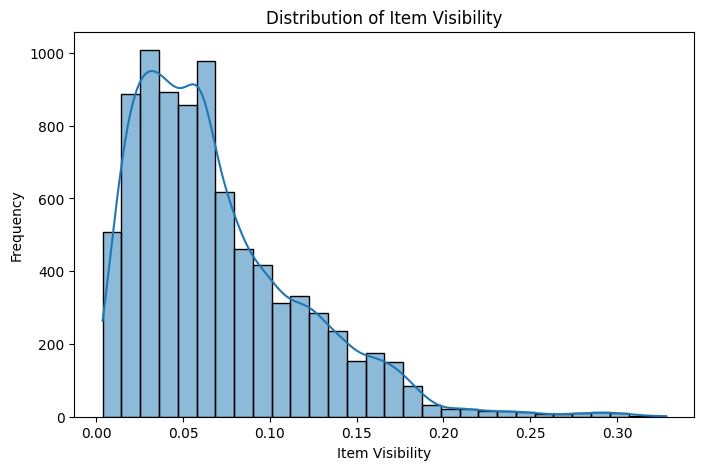

In [91]:
plt.figure(figsize=(8,5))
sns.histplot(data['Item_Visibility'], bins=30, kde=True)
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

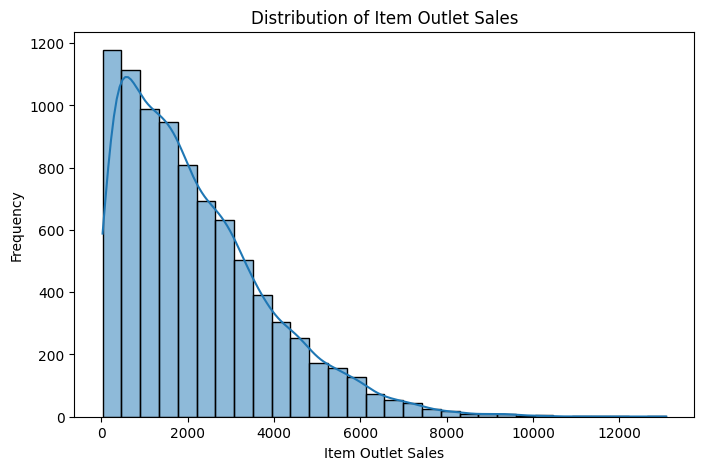

In [79]:
plt.figure(figsize=(8,5))
sns.histplot(data['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

In [84]:
data['log_Item_Outlet_Sales'] = np.log1p(data['Item_Outlet_Sales'])

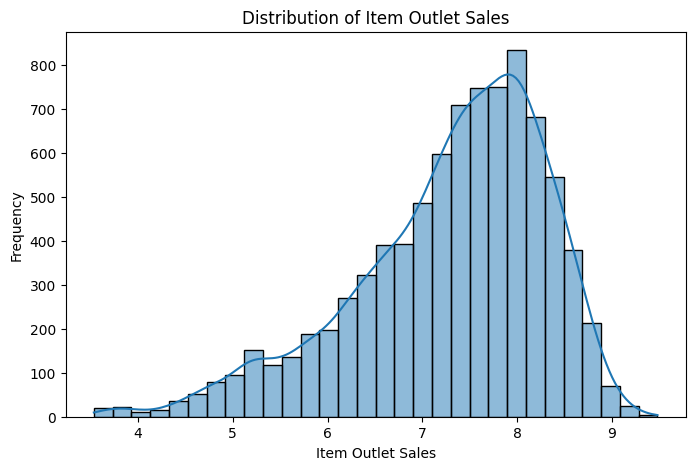

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(data['log_Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

In [96]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category,log_Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,FD,8.225808
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,DR,6.096776
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,FD,7.648868
3,19.20,Regular,0.060794,182.0950,Medium,Tier 3,Grocery Store,FD,6.597664
4,8.93,Low Fat,0.048060,53.8614,High,Tier 3,Supermarket Type1,NC,6.903451


# Modeling 

Outlet_Size will be encoded by OHE

Item_Fat_Content will be encoded by OHE

Outlet_Location_Type will be encoded by OHE

Outlet_Type will be encoded by OHE


In [97]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['log_Item_Outlet_Sales'])
y = data['log_Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        # numerical: scaling
        ('num_robust', RobustScaler(), ['Item_Visibility']),
        ('num_std', StandardScaler(), ['Item_Weight', 'Item_MRP']),
        
        # categorical: One-Hot Encoding
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), 
         ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category'])
    ],
    remainder='passthrough'  # لو في أعمدة عددية تانية مش حددتها
)

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_robust', ...), ('num_std', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [103]:
y_pred = model.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.5336478336033637
MAE: 0.4160679432293013
R²: 0.7291276833114806


In [ ]:
from sklearn.Tree import DecisionTreeRegressor


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# create and fit a pipeline with RandomForestRegressor
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

rf_model.fit(X_train, y_train)

# predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))

RF RMSE: 0.5514634486167848
RF MAE: 0.43079709810866107
RF R2: 0.7107398643607057


In [114]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# create and fit a pipeline with Ridge regression
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
# predictions and evaluation
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge R2:", r2_score(y_test, y_pred_ridge))


print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

Lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
]) 
Lasso_model.fit(X_train, y_train)
# predictions and evaluation
y_pred_Lasso = Lasso_model.predict(X_test)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_Lasso))
print("Lasso R2:", r2_score(y_test, y_pred_Lasso))

Ridge RMSE: 0.5337864497387576
Ridge MAE: 0.4161717887513456
Ridge R2: 0.7289869457394296
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Lasso RMSE: 1.0269907025746914
Lasso MAE: 0.8055811654697385
Lasso R2: -0.0032014346679158923
